# Descriptive fit analysis

### Here, I'll look at the descriptive fits to both experimental and simulated/model data to read off and analyze SF tuning properties

In [148]:
import numpy as np
import helper_fcns as hfunc
from scipy.stats.mstats import gmean
import autoreload
import matplotlib.pyplot as plt
plt.style.use('paul_plt_style.mplstyle')
import matplotlib.backends.backend_pdf as pltSave
%matplotlib inline

save_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Figures'; # local
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'; # local
# save_loc = '/users/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Figures/'; # CNS
# data_loc = '/users/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'; # CNS
expName = 'dataList.npy';
fitName = 'fitList_180430_LR_sqrt.npy';
descrName = 'descrFits.npy';
descrModName = 'descrFitsModel.npy';
respName = 'respAboveBase.npy';

muLoc = 2; # mu is in location '2' of parameter arrays

In [10]:
nCells = 59;
nFamilies = 5;
nCons = 2;

useLowRespCut = 0; # should you filter the data based on analysis in "Considering responsivity..."

height = 3/4; # measure BW at half-height
sf_range = [0.01, 10]; # allowed values of 'mu' for fits - see descr_fit.py for details

In [11]:
dataList = np.load(data_loc + expName, encoding='latin1').item();
respAbBase = np.load(data_loc + respName, encoding='latin1')

In [12]:
descrExp = np.load(data_loc + descrName, encoding='latin1').item()
descrMod = np.load(data_loc + descrModName, encoding='latin1').item()

In [13]:
modParams = np.load(data_loc + fitName, encoding='latin1').item();

## SfN 2018?

Quickly, on 5/3 (day of abstract deadline), let's see if the "tuned" normalization in the model accounts for the contrast-dependent shifts in SF tuning, and in exactly what way

In [189]:
save_loc = '../Figures/SFN/'; save_name = 'cotuning.pdf';

In [14]:
filterSF = 0; # where in parameter array
normSF = -2; # where in parameter array

What are the relative preferences of the filter and the normalization pool?

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


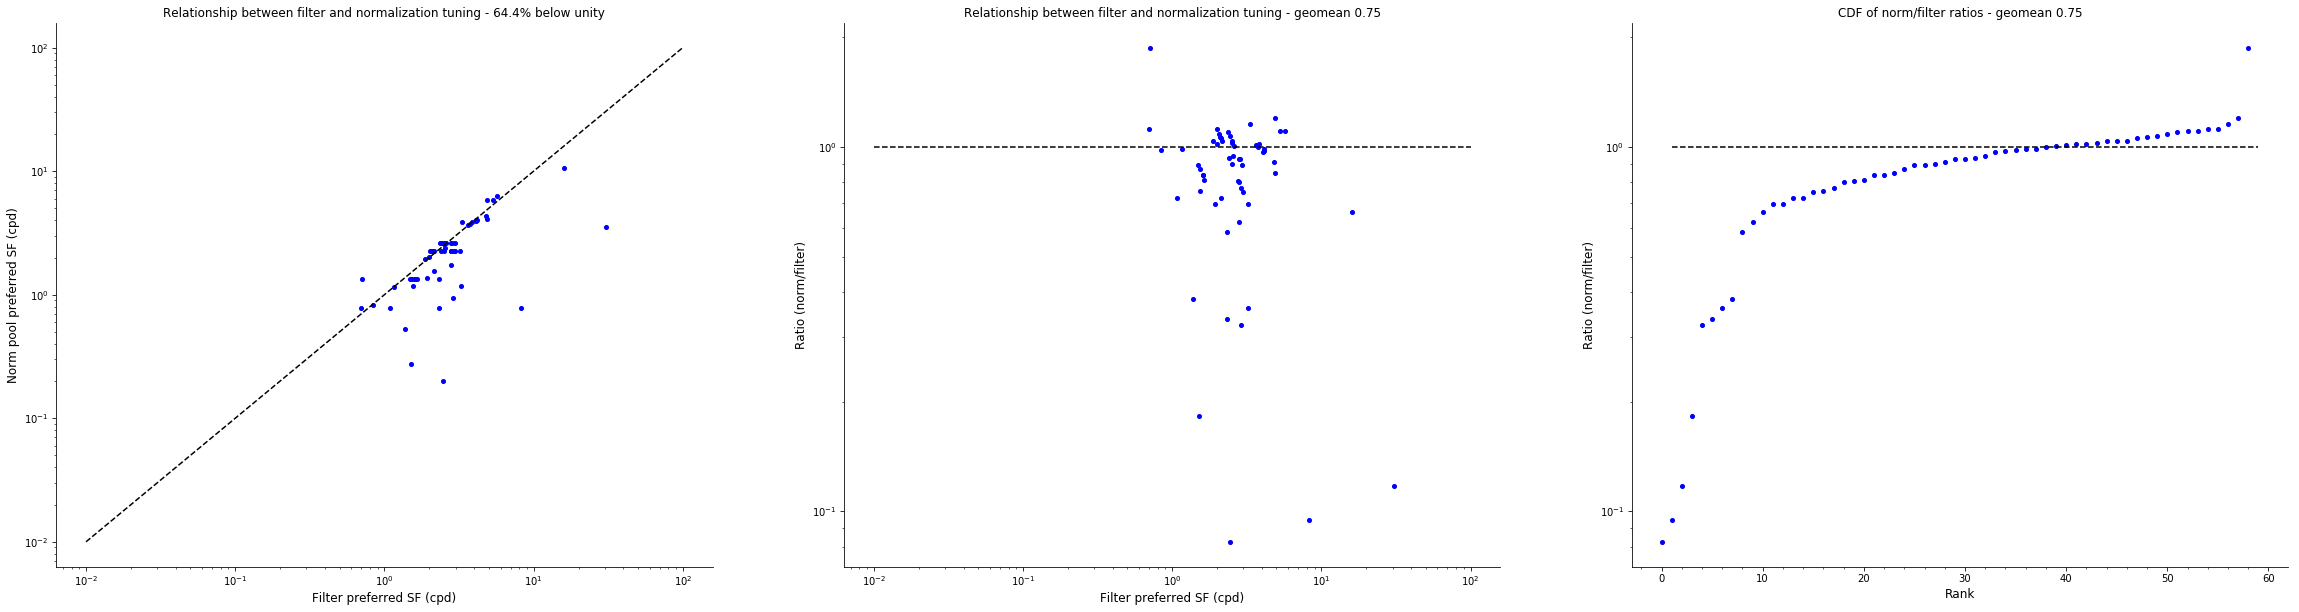

In [211]:
filt_vals = np.zeros((len(modParams), 1));
norm_vals = np.zeros((len(modParams), 1));
ratios = np.zeros((len(modParams), 1));
under_list = [];
for i in modParams:
    fv = modParams[i]['params'][filterSF];
    nv = np.exp(modParams[i]['params'][normSF])
    filt_vals[i] = fv;
    norm_vals[i] = nv;
    ratios[i] = nv/fv;
    if nv < fv:
        #print('cell %d' % (i+1))
        under_list.append(i);

sfn = plt.figure(figsize=(40, 10))

y = plt.subplot(1, 3, 1);
plt.loglog(filt_vals, norm_vals, 'b.');
#plt.loglog(filt_vals[under_list], norm_vals[under_list], 'r.');
plt.loglog([1e-2, 1e2], [1e-2, 1e2], 'k--');
plt.xlabel('Filter preferred SF (cpd)', fontSize = 'large');
plt.ylabel('Norm pool preferred SF (cpd)', fontSize = 'large');
below_unity = np.sum(ratios<=1) / len(ratios)
plt.title('Relationship between filter and normalization tuning - %.1f%% below unity' % (100*below_unity), fontSize = 'large');

plt.subplot(1, 3, 2);
plt.loglog(filt_vals, ratios, 'b.');
plt.loglog([1e-2, 1e2], [1, 1], 'k--');
plt.xlabel('Filter preferred SF (cpd)', fontSize = 'large');
plt.ylabel('Ratio (norm/filter)', fontSize = 'large');
gmRatio = gmean(ratios)
plt.title('Relationship between filter and normalization tuning - geomean %.2f' % (gmRatio), fontSize = 'large');

# as CDF
cdf_rats = np.argsort(ratios.transpose())[0];
plt.subplot(1, 3, 3);
plt.semilogy(range(len(cdf_rats)), ratios[cdf_rats], 'b.');
plt.semilogy([1, len(cdf_rats)], [1, 1], 'k--');
plt.xlabel('Rank', fontSize = 'large');
plt.ylabel('Ratio (norm/filter)', fontSize = 'large');
gmRatio = gmean(ratios)
plt.title('CDF of norm/filter ratios - geomean %.2f' % (gmRatio), fontSize = 'large');

# save
pdfSv = pltSave.PdfPages(str(save_loc + save_name));
pdfSv.savefig(sfn)
pdfSv.close();


Next, list the cells in ascending order of ratio

In [179]:
asc_rats = np.argsort(ratios.transpose());
for i in range(len(asc_rats[0])):
    print('%d: %.3f' % (asc_rats[0][i]+1, ratios[asc_rats[0][i]]))

59: 0.082
25: 0.095
54: 0.117
8: 0.183
41: 0.326
37: 0.336
45: 0.361
16: 0.383
49: 0.583
5: 0.622
53: 0.662
51: 0.697
10: 0.698
17: 0.724
23: 0.724
44: 0.754
26: 0.758
9: 0.772
11: 0.803
6: 0.807
24: 0.812
48: 0.837
14: 0.838
55: 0.847
40: 0.870
20: 0.891
32: 0.895
3: 0.896
57: 0.911
18: 0.925
12: 0.926
33: 0.935
58: 0.943
4: 0.972
22: 0.976
2: 0.981
28: 0.986
43: 0.990
36: 1.003
1: 1.007
52: 1.015
42: 1.017
39: 1.018
29: 1.027
34: 1.039
31: 1.041
50: 1.042
46: 1.057
7: 1.063
19: 1.072
35: 1.083
38: 1.101
27: 1.107
47: 1.108
15: 1.118
13: 1.123
21: 1.159
56: 1.200
30: 1.875


### Get bandwidth/prefSf measures organized

In [11]:
bwMod = np.zeros((nCells, nFamilies, nCons)) * np.nan;
bwExp = np.zeros((nCells, nFamilies, nCons)) * np.nan;

pSfMod = np.zeros((nCells, nFamilies, nCons)) * np.nan;
pSfExp = np.zeros((nCells, nFamilies, nCons)) * np.nan;

In [12]:
for i in descrExp:
    for f in range(nFamilies):
        
        if i in descrMod:
            ignore, bwMod[i, f, 0] = hfunc.compute_SF_BW(descrMod[i]['params'][f, 0, :], height, sf_range)
            ignore, bwMod[i, f, 1] = hfunc.compute_SF_BW(descrMod[i]['params'][f, 1, :], height, sf_range)
            pSfMod[i, f, 0] = descrMod[i]['params'][f, 0, muLoc]
            pSfMod[i, f, 1] = descrMod[i]['params'][f, 1, muLoc]

        if i in descrExp:
            ignore, bwExp[i, f, 0] = hfunc.compute_SF_BW(descrExp[i]['params'][f, 0, :], height, sf_range)
            ignore, bwExp[i, f, 1] = hfunc.compute_SF_BW(descrExp[i]['params'][f, 1, :], height, sf_range)
            pSfExp[i, f, 0] = descrExp[i]['params'][f, 0, muLoc]
            pSfExp[i, f, 1] = descrExp[i]['params'][f, 1, muLoc]

In [13]:
bwDiffMod = bwMod[:, :, 0] - bwMod[:,:,1]
bwDiffExp = bwExp[:, :, 0] - bwExp[:,:,1]

pSfRatioMod = pSfMod[:, :, 0] / pSfMod[:,:,1]
pSfRatioExp = pSfExp[:, :, 0] / pSfExp[:,:,1]

### Considering responsivity at low contrast & high dispersion

Inspired by chats with Najib, I should ensure that the effect of dispersion on contrast dependent shifts holds if we look only at cells with meaningful responses at the low contrast, maximal dispersion case.

In [14]:
peakCrit = 10; # i.e. cells with maximum response at low con/high disp condition below this won't be counted
ratCrit = 0.12; # i.e. cells whose sum of responses '''''' as a fraction of the same at high con/low disp won't be counted

In [15]:
nCells = len(dataList['unitName']);
peaks = np.zeros((nCells, 2)); # do (, 2) so we can compare high con/low disp to low con/high disp
sums = np.zeros((nCells, 2));

for c in range(nCells):
    responses = respAbBase[c, :, :, :];
    
    peaks[c, 0] = np.amax(responses[0][0]); # peak response for single grating, high contrast
    sums[c, 0] = np.sum(responses[0][0]);
    
    peaks[c, 1] = np.amax(responses[4][1]); # ' ' for maximum dispersion, low contrast
    sums[c, 1] = np.sum(responses[4][1]);
    
rats = np.divide(sums[:, 1], sums[:, 0]);

In [16]:
if useLowRespCut:
    # what's the criteri(a/on)?
    keepCells = rats > ratCrit;
    #keepCells = peaks[:, 1] > peakCrit;
    
    bwMod = bwMod[keepCells, :];
    bwExp = bwExp[keepCells, :];
    
    pSfExp = pSfExp[keepCells, :];
    pSfMod = pSfMod[keepCells, :];
    
    bwDiffMod = bwDiffMod[keepCells, :];
    bwDiffExp = bwDiffExp[keepCells, :];

    pSfRatioMod = pSfRatioMod[keepCells, :];
    pSfRatioExp = pSfRatioExp[keepCells, :];

### Plot BW differences

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


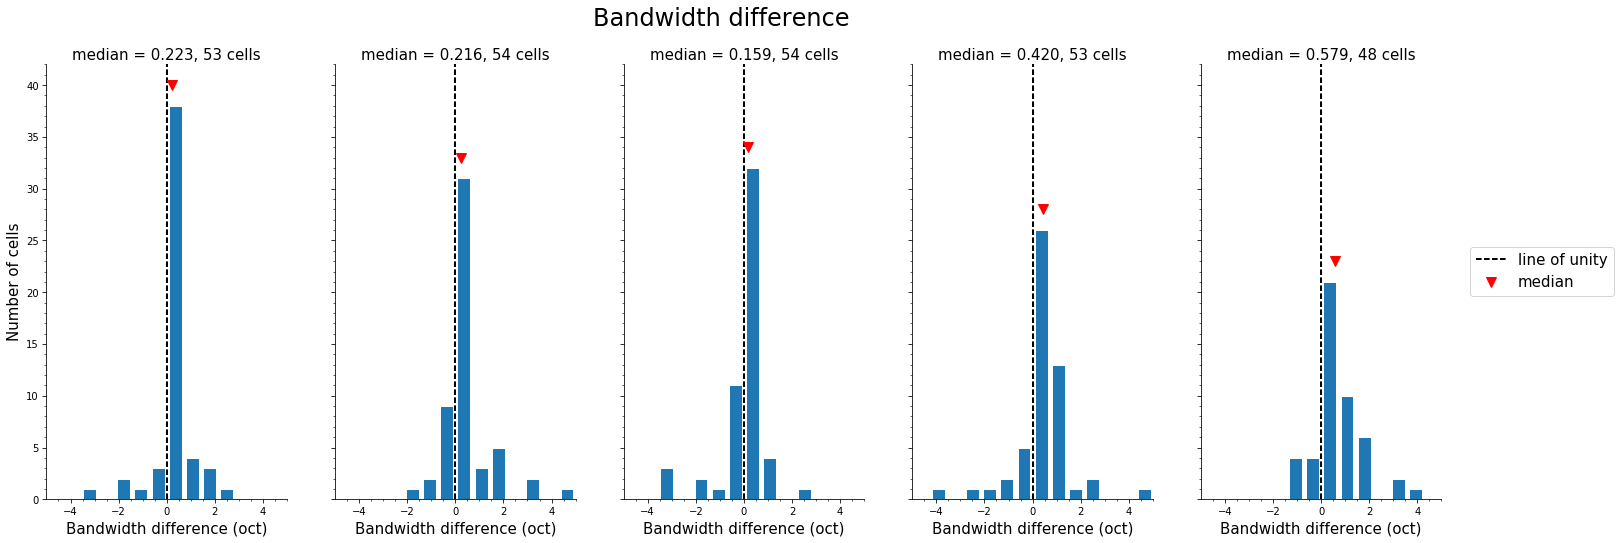

In [17]:
fig, allBW = plt.subplots(1, nFamilies, sharex='col', sharey='row', figsize=(25,8))

allBW[0].set_ylabel('Number of cells', fontsize=15);
binRange = (-5, 5)
nBins = 15;
binz = np.linspace(binRange[0], binRange[1], num=nBins);

for fam in range(nFamilies):
    validOnesExp = np.logical_and(bwDiffExp[:,fam]>-5, pSfRatioExp[:,fam]<5);
    toConsider = bwDiffExp[validOnesExp, fam];
    countz = allBW[fam].hist(toConsider, binz, alpha=1, rwidth=0.75);
    
    medianRatio = np.median(toConsider);
    allBW[fam].hold;
    
    unity = allBW[fam].axvline(0, ls='--', color='k', linewidth=2);
    medPt = allBW[fam].plot(medianRatio, np.amax(countz[0])+2, 'rv', markersize=10);
    
    allBW[fam].set_xlabel('Bandwidth difference (oct)', fontsize=15);
    allBW[fam].set_xlim(binRange);
    
    allBW[fam].text(0.5, 1.01,'median = {:.3f}, {:.0f} cells'.format(medianRatio, sum(countz[0])), horizontalalignment='center',\
                     transform=allBW[fam].transAxes, FontSize=15)
    
fig.legend((unity, medPt[0]), ('line of unity', 'median'), fontsize=15, loc='right');
plt.suptitle('Bandwidth difference', fontsize=24);

### Plot pSf ratios

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


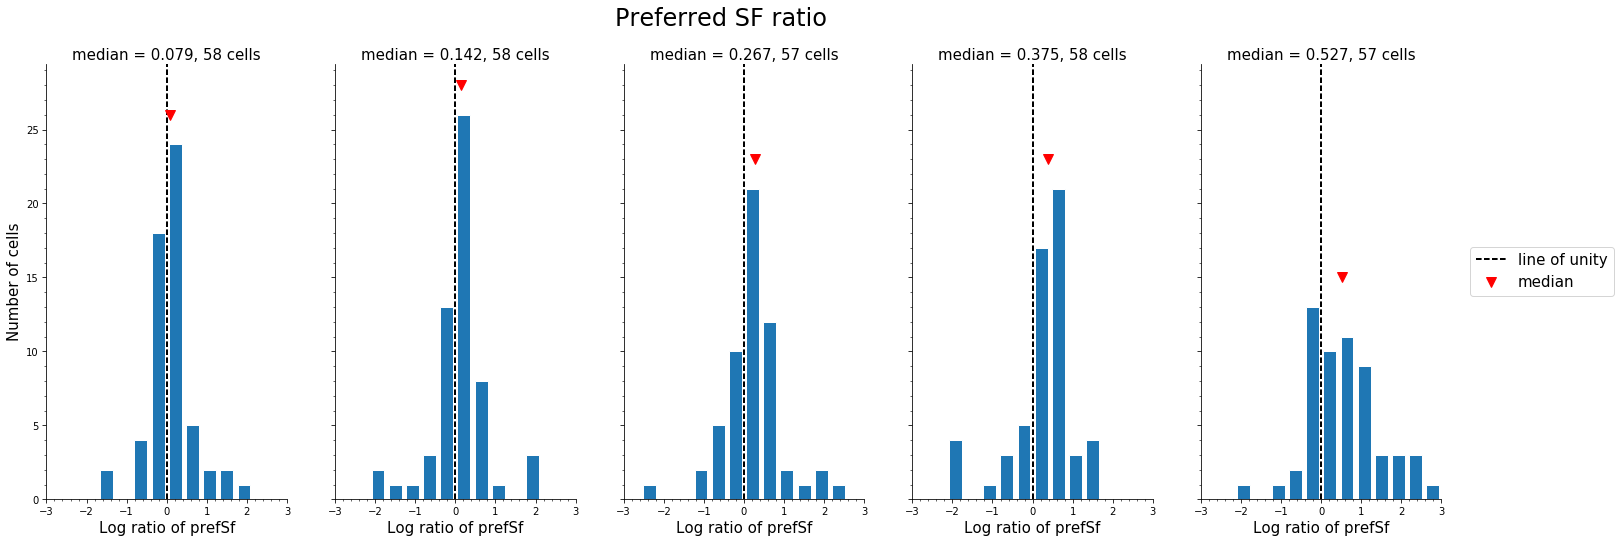

In [18]:
fig, allpSf = plt.subplots(1, nFamilies, sharex='col', sharey='row', figsize=(25,8))

allpSf[0].set_ylabel('Number of cells', fontsize=15)
binRange = (-3, 3) # in log2 space...
nBins = 15;
binz = np.linspace(binRange[0], binRange[1], num=nBins)

for fam in range(nFamilies):
    validOnesExp = np.logical_and(pSfRatioExp[:,fam]>0, pSfRatioExp[:,fam]<10);
    toConsider = np.log2(pSfRatioExp[validOnesExp, fam]);
    countz = allpSf[fam].hist(toConsider, binz, alpha=1, rwidth=0.75)

    medianRatio = np.median(toConsider);
    allpSf[fam].hold

    unity = allpSf[fam].axvline(0, ls='--', color='k', linewidth=2)
    medPt = allpSf[fam].plot(medianRatio, np.amax(countz[0])+2, 'rv', markersize=10)
    
    allpSf[fam].set_xlabel('Log ratio of prefSf', fontsize=15)
    allpSf[fam].set_xlim(binRange)
    
    allpSf[fam].text(0.5, 1.01,'median = {:.3f}, {:.0f} cells'.format(medianRatio, sum(countz[0])), horizontalalignment='center',\
                     transform=allpSf[fam].transAxes, FontSize=15)
    
fig.legend((unity, medPt[0]), ('line of unity', 'median'), fontsize=15, loc='right');
plt.suptitle('Preferred SF ratio', fontsize=24);

In [19]:
#plt.matplotlib.font_manager.findSystemFonts()

### Relationship between prefSf and sfBW (octaves)

In [25]:
np.median(pSfExp[:, 0, 0])

3.6050224736318839

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


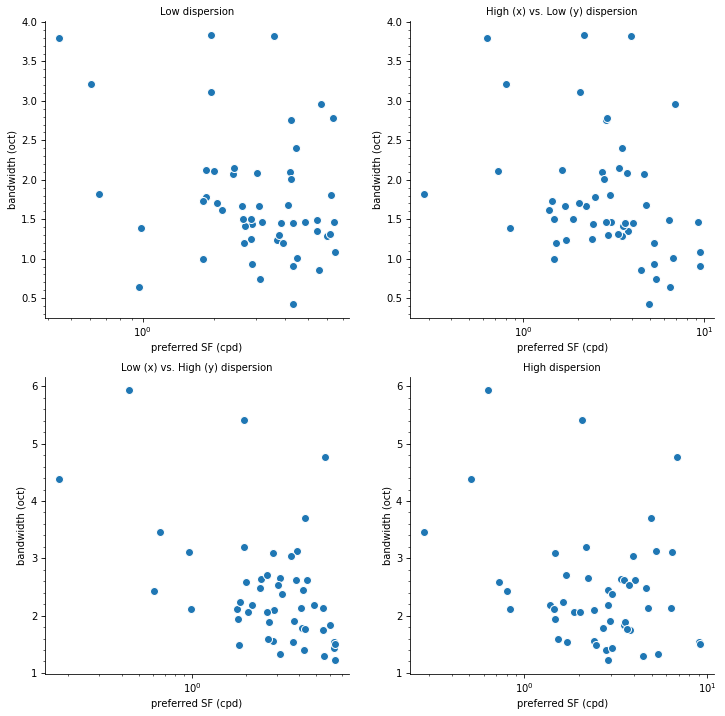

In [20]:
fig, prefVbw = plt.subplots(2, 2, figsize = (12, 12));

pSfLow = pSfExp[:, 0, 0]; # pSf at low dispersion, high contrast
pSfHigh = pSfExp[:, 4, 0]; # pSf at high dispersion, high contrast

sfBwLow = bwExp[:, 0, 0]; # pSf at low dispersion, high contrast
sfBwHigh = bwExp[:, 4, 0]; # pSf at high dispersion, high contrast

# Low versus Low
prefVbw[0, 0].semilogx(pSfLow, sfBwLow, 'o', mec='white');
prefVbw[0, 0].set_xlabel('preferred SF (cpd)');
prefVbw[0, 0].set_ylabel('bandwidth (oct)');
prefVbw[0, 0].set_title('Low dispersion');

# Low versus High
prefVbw[1, 0].semilogx(pSfLow, sfBwHigh, 'o', mec='white');
prefVbw[1, 0].set_xlabel('preferred SF (cpd)');
prefVbw[1, 0].set_ylabel('bandwidth (oct)');
prefVbw[1, 0].set_title('Low (x) vs. High (y) dispersion');

# High versus Low
prefVbw[0, 1].semilogx(pSfHigh, sfBwLow, 'o', mec='white');
prefVbw[0, 1].set_xlabel('preferred SF (cpd)');
prefVbw[0, 1].set_ylabel('bandwidth (oct)');
prefVbw[0, 1].set_title('High (x) vs. Low (y) dispersion');

# High versus high
prefVbw[1, 1].semilogx(pSfHigh, sfBwHigh, 'o', mec='white');
prefVbw[1, 1].set_xlabel('preferred SF (cpd)');
prefVbw[1, 1].set_ylabel('bandwidth (oct)');
prefVbw[1, 1].set_title('High dispersion');


### Relationship between prefSf and sfBw (linear cpd)

Just a sanity check for correlation between prefSf and linear bandwidth

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


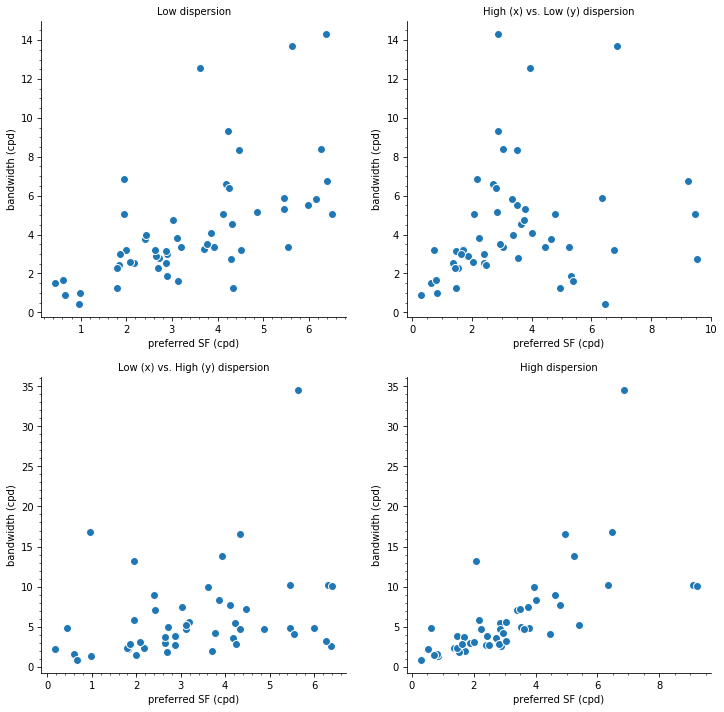

In [21]:
fig, prefVbw = plt.subplots(2, 2, figsize = (12, 12));

pSfLow = pSfExp[:, 0, 0]; # pSf at low dispersion, high contrast
pSfHigh = pSfExp[:, 4, 0]; # pSf at high dispersion, high contrast

sfBwLow = bwExp[:, 0, 0]; # pSf at low dispersion, high contrast
sfBwHigh = bwExp[:, 4, 0]; # pSf at high dispersion, high contrast

linLow = hfunc.bw_log_to_lin(sfBwLow, pSfLow);
linHigh = hfunc.bw_log_to_lin(sfBwHigh, pSfHigh);

# Low versus Low
prefVbw[0, 0].plot(pSfLow, linLow[0], 'o', mec='white');
prefVbw[0, 0].set_xlabel('preferred SF (cpd)');
prefVbw[0, 0].set_ylabel('bandwidth (cpd)');
prefVbw[0, 0].set_title('Low dispersion');

# Low versus High
prefVbw[1, 0].plot(pSfLow, linHigh[0], 'o', mec='white');
prefVbw[1, 0].set_xlabel('preferred SF (cpd)');
prefVbw[1, 0].set_ylabel('bandwidth (cpd)');
prefVbw[1, 0].set_title('Low (x) vs. High (y) dispersion');

# High versus Low
prefVbw[0, 1].plot(pSfHigh, linLow[0], 'o', mec='white');
prefVbw[0, 1].set_xlabel('preferred SF (cpd)');
prefVbw[0, 1].set_ylabel('bandwidth (cpd)');
prefVbw[0, 1].set_title('High (x) vs. Low (y) dispersion');

# High versus high
prefVbw[1, 1].plot(pSfHigh, linHigh[0], 'o', mec='white');
prefVbw[1, 1].set_xlabel('preferred SF (cpd)');
prefVbw[1, 1].set_ylabel('bandwidth (cpd)');
prefVbw[1, 1].set_title('High dispersion');


### Correlations between preferred SF and ratio of pSf high/low

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


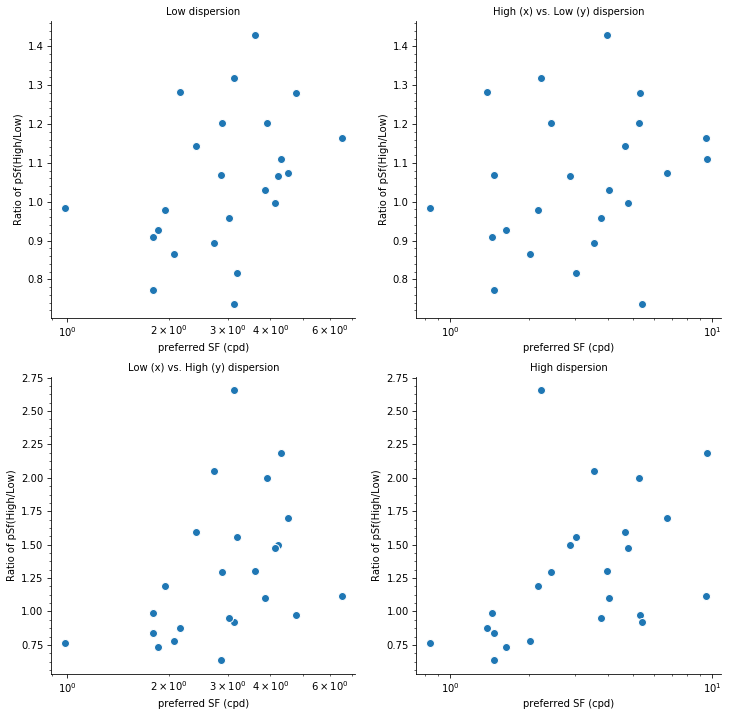

In [148]:
fig, pSfCorr = plt.subplots(2, 2, figsize = (12, 12));

pSfLow = pSfExp[:, 0, 0]; # pSf at low dispersion, high contrast
pSfShiftLow = pSfRatioExp[:, 0]; # ratio of pSf at high/low contrast for low dispersion

pSfHigh = pSfExp[:, 4, 0]; # pSf at high dispersion, high contrast
pSfShiftHigh = pSfRatioExp[:, 4]; # ratio of pSf at high/low contrast for high dispersion

# Low versus Low
pSfCorr[0, 0].semilogx(pSfLow, pSfShiftLow, 'o', mec='white');
pSfCorr[0, 0].set_xlabel('preferred SF (cpd)');
pSfCorr[0, 0].set_ylabel('Ratio of pSf(High/Low)');
pSfCorr[0, 0].set_title('Low dispersion');

# Low versus High
pSfCorr[1, 0].semilogx(pSfLow, pSfShiftHigh, 'o', mec='white');
pSfCorr[1, 0].set_xlabel('preferred SF (cpd)');
pSfCorr[1, 0].set_ylabel('Ratio of pSf(High/Low)');
pSfCorr[1, 0].set_title('Low (x) vs. High (y) dispersion');

# High versus Low
pSfCorr[0, 1].semilogx(pSfHigh, pSfShiftLow, 'o', mec='white');
pSfCorr[0, 1].set_xlabel('preferred SF (cpd)');
pSfCorr[0, 1].set_ylabel('Ratio of pSf(High/Low)');
pSfCorr[0, 1].set_title('High (x) vs. Low (y) dispersion');

# High versus high
pSfCorr[1, 1].semilogx(pSfHigh, pSfShiftHigh, 'o', mec='white');
pSfCorr[1, 1].set_xlabel('preferred SF (cpd)');
pSfCorr[1, 1].set_ylabel('Ratio of pSf(High/Low)');
pSfCorr[1, 1].set_title('High dispersion');


### Correlations between measured BW and difference of bandwidth high-low (oct)

/Users/paulgerald/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


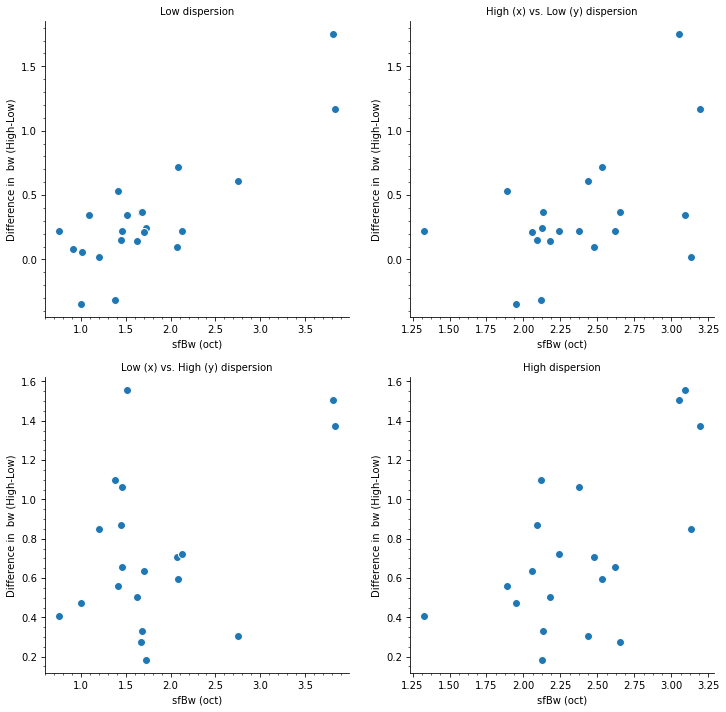

In [149]:
fig, sfBwCorr = plt.subplots(2, 2, figsize = (12, 12));

sfBwLow = bwExp[:, 0, 0]; # pSf at low dispersion, high contrast
sfBwShiftLow = bwDiffExp[:, 0]; # ratio of pSf at high/low contrast for low dispersion

sfBwHigh = bwExp[:, 4, 0]; # pSf at high dispersion, high contrast
sfBwShiftHigh = bwDiffExp[:, 4]; # ratio of pSf at high/low contrast for high dispersion

# Low versus Low
sfBwCorr[0, 0].plot(sfBwLow, sfBwShiftLow, 'o', mec='white');
sfBwCorr[0, 0].set_xlabel('sfBw (oct)');
sfBwCorr[0, 0].set_ylabel('Difference in  bw (High-Low)');
sfBwCorr[0, 0].set_title('Low dispersion');

# Low versus High
sfBwCorr[1, 0].plot(sfBwLow, sfBwShiftHigh, 'o', mec='white');
sfBwCorr[1, 0].set_xlabel('sfBw (oct)');
sfBwCorr[1, 0].set_ylabel('Difference in  bw (High-Low)');
sfBwCorr[1, 0].set_title('Low (x) vs. High (y) dispersion');

# High versus Low
sfBwCorr[0, 1].plot(sfBwHigh, sfBwShiftLow, 'o', mec='white');
sfBwCorr[0, 1].set_xlabel('sfBw (oct)');
sfBwCorr[0, 1].set_ylabel('Difference in  bw (High-Low)');
sfBwCorr[0, 1].set_title('High (x) vs. Low (y) dispersion');

# High versus high
sfBwCorr[1, 1].plot(sfBwHigh, sfBwShiftHigh, 'o', mec='white');
sfBwCorr[1, 1].set_xlabel('sfBw (oct)');
sfBwCorr[1, 1].set_ylabel('Difference in  bw (High-Low)');
sfBwCorr[1, 1].set_title('High dispersion');
